## Deteccion para hipotesis binaria en canal AWGN
En un canal AWGN, se asume que el ruido que afecta la senial transmitida es aditivo, lo que significa que se suma a la senial original en el proceso de transmision. Se supone que el ruido es gaussiano lo que implica que sigue una distribucion normal con una media de cero y una varianza determinada. Ademas, se considera que el ruido es **blanco**, lo que significa que su densisdad espectral de potencia es constante en todas las frecuencias.

(array([5009.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0., 4991.]),
 array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
        0.225, 0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425,
        0.45 , 0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 ,
        0.675, 0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875,
        0.9  , 0.925, 0.95 , 0.975, 1.   ]),
 <BarContainer object of 40 artists>)

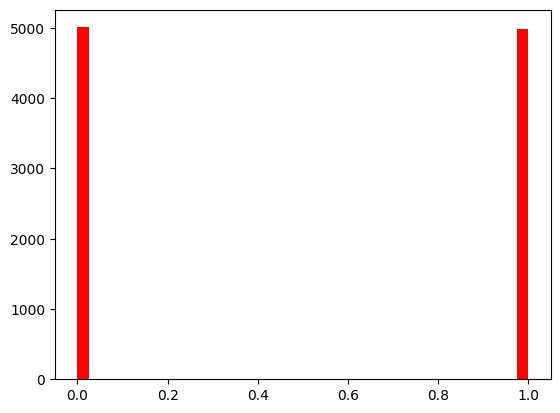

In [4]:
import numpy as np
import matplotlib.pyplot as plt

lambda0 = 2
lambda1 = 10
nbSamples = 10000

H0 = 0.5
H1 = 0.5
P = [H0, H1]

arr = np.random.choice([0, 1], nbSamples, P)
#arr2 = np.random.choice([0, 1], nbSamples, P)

plt.figure(0)
plt.hist(arr, 40, color="red")

#plt.hist(signalReceivedh1, 50, align="right")

En un canal AWGN se supone que el ruido es gaussiano, pero no necesariamente tiene que ser guassiana la senial transmitida, por lo que tomara una senial con una distribucion de Poisson

(array([6.750e+02, 0.000e+00, 1.390e+03, 0.000e+00, 1.385e+03, 0.000e+00,
        9.390e+02, 0.000e+00, 5.140e+02, 0.000e+00, 3.700e+02, 0.000e+00,
        3.760e+02, 0.000e+00, 5.020e+02, 0.000e+00, 5.530e+02, 0.000e+00,
        6.130e+02, 0.000e+00, 6.610e+02, 0.000e+00, 5.330e+02, 0.000e+00,
        4.570e+02, 0.000e+00, 3.710e+02, 0.000e+00, 2.490e+02, 0.000e+00,
        1.820e+02, 0.000e+00, 1.020e+02, 0.000e+00, 5.400e+01, 0.000e+00,
        3.600e+01, 0.000e+00, 1.500e+01, 0.000e+00, 1.200e+01, 0.000e+00,
        4.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ]),
 <BarContainer object of 50 

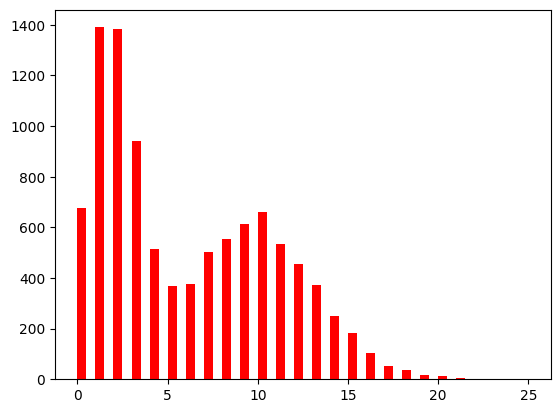

In [6]:
# Generador de hipotesis

# Inicializo el vector Y con ceros
Y = np.zeros(nbSamples, dtype= int)

j=0
for a in range(0, nbSamples):
    if (arr[a]==0):
        Y[j]=np.random.poisson(lambda0)
    if (arr[a]==1):
        Y[j]=np.random.poisson(lambda1)

plt.hist(y, 50, color="red")

(array([  2.,   4.,   3.,  23.,  40.,  76., 133., 232., 328., 443., 517.,
        639., 577., 584., 487., 368., 254., 155.,  87.,  53.,  24.,   9.,
          5.,   2.,   2.,   1.,   1.,   4.,   7.,  30.,  41.,  85., 148.,
        220., 337., 437., 545., 591., 617., 540., 465., 340., 232., 159.,
         78.,  51.,  15.,   4.,   2.,   3.]),
 array([-1.77579346, -1.46612222, -1.15645098, -0.84677974, -0.5371085 ,
        -0.22743726,  0.08223398,  0.39190522,  0.70157646,  1.0112477 ,
         1.32091894,  1.63059018,  1.94026142,  2.24993266,  2.5596039 ,
         2.86927514,  3.17894638,  3.48861762,  3.79828886,  4.1079601 ,
         4.41763134,  4.72730258,  5.03697382,  5.34664506,  5.6563163 ,
         5.96598754,  6.27565878,  6.58533003,  6.89500127,  7.20467251,
         7.51434375,  7.82401499,  8.13368623,  8.44335747,  8.75302871,
         9.06269995,  9.37237119,  9.68204243,  9.99171367, 10.30138491,
        10.61105615, 10.92072739, 11.23039863, 11.54006987, 11.84974111,
 

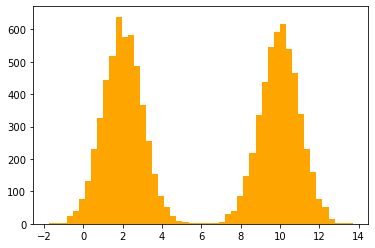

In [25]:
# Se genera el ruido

noiseHypothesis = np.ones(nbSamples, dtype=int)

noise = [np.random.normal(lambda1) if hypothesis[i]>0 else np.random.normal(lambda0) for i in range(nbSamples)]

plt.hist(noise, 50, color="orange")

(array([7.080e+02, 0.000e+00, 1.370e+03, 0.000e+00, 1.341e+03, 0.000e+00,
        9.590e+02, 0.000e+00, 5.580e+02, 0.000e+00, 3.750e+02, 0.000e+00,
        3.910e+02, 0.000e+00, 4.790e+02, 0.000e+00, 5.650e+02, 0.000e+00,
        5.780e+02, 0.000e+00, 6.690e+02, 0.000e+00, 5.370e+02, 0.000e+00,
        4.740e+02, 0.000e+00, 3.080e+02, 0.000e+00, 2.410e+02, 0.000e+00,
        1.630e+02, 0.000e+00, 1.260e+02, 0.000e+00, 7.400e+01, 0.000e+00,
        3.600e+01, 0.000e+00, 3.300e+01, 0.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
         5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
        11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
        16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5, 20. , 20.5, 21. , 21.5,
        22. , 22.5, 23. , 23.5, 24. , 24.5, 25. ]),
 <BarContainer object of 50 

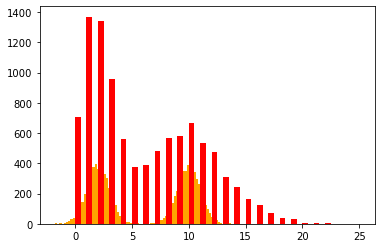

In [37]:
# Por el supuesto del canal AWGN se ruma el ruido gaussiano con la senial trasmitida

plt.hist(noise, bins=80, color="orange")
plt.hist(y, bins=50, color="red")

In [8]:
import sympy as sp
C0 = 0
C1 = 1
Var = 1
M = 0
#EVALUAR LA FUNCION Q DE FORMA SIMBOLICA
#Calcular probabilidad de error con estimacion por teoria(Q)
g = sp.Symbol('g')
g_d = (g-M)/(sp.sqrt(Var))
F = sp.exp(-(g_d**2)/2)
Q = (1/(2*sp.pi))*sp.integrate(F,(g,((C1-C0)/2*sp.sqrt(Var)),sp.oo)) # solo para varianza unitaria y media 0
resintegral = sp.simplify(Q)
numeric_result = resintegral.evalf();
print(numeric_result)

0.123088669288791


In [10]:
#importamos norm de la libreria scipy
from scipy.stats import norm
x=1.5
#calculamos q. SF es "survival function"
#definida como 1-(funcion acumulativa)
q = norm.sf(x)
print(q)

0.15865525393145707
